# Iris 데이터 다중분류
---

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [82]:
iris = pd.read_csv('./datasets/iris.csv')

In [83]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
iris.shape

(150, 6)

In [85]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [87]:
iris[iris.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [88]:
type(iris.duplicated())

pandas.core.series.Series

In [89]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [90]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [91]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

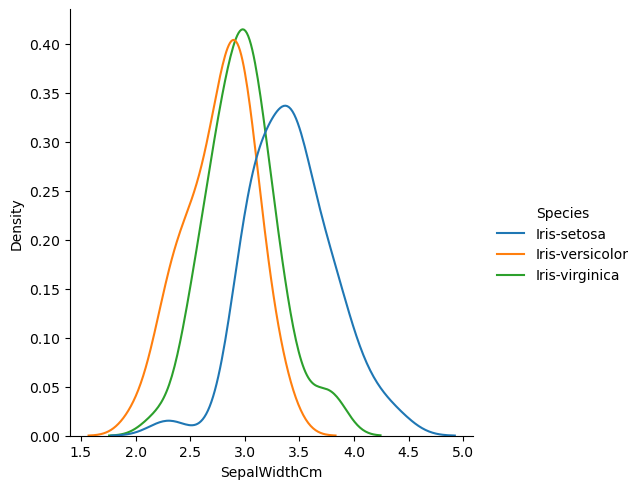

In [92]:
sns.displot(data=iris, x='SepalWidthCm', hue='Species', kind='kde')

In [93]:
df = iris.copy()

In [94]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 인코딩

In [95]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(df['Species'])
df['Species'] = encoder.transform(df['Species'])

In [96]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [97]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [98]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [99]:
df = df.drop(labels='Id',axis=1)

In [100]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: Species, Length: 150, dtype: int32)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, shuffle=True, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [104]:
y_test.value_counts()

2    10
0    10
1    10
Name: Species, dtype: int64

# 스케일링

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

type(X_train_scaled)

numpy.ndarray

In [108]:
X_train_scaled[:5]

array([[ 0.74198233, -0.31636327,  0.33505555,  0.13668195],
       [ 0.24176952, -1.91723763,  0.73769741,  0.39702852],
       [-0.00833688, -0.77375594,  0.10497449,  0.00650866],
       [ 1.11714194, -0.08766693,  0.85273794,  1.43841479],
       [-0.50854969,  1.97060011, -1.16047137, -1.03487761]])

In [109]:
y_train = y_train.to_numpy()

In [110]:
y_train

array([1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1])

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [112]:
X_test_scaled = scaler.transform(X_test)

In [113]:
y_pred = knc.predict(X_test_scaled)

In [114]:
(y_pred == y_test).sum() / X_test.shape[0]

0.9333333333333333

In [115]:
y_pred[:10]

array([2, 0, 2, 1, 0, 0, 2, 0, 2, 0])

In [116]:
y_test[:10]

102    2
24     0
77     1
90     1
28     0
11     0
127    2
18     0
126    2
45     0
Name: Species, dtype: int32

In [117]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

hist = [] 

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv =5, scoring='accuracy')
    
    hist.append(scores.mean())
    
hist

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 91.33it/s]


[0.9416666666666667,
 0.9333333333333333,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9666666666666666,
 0.9583333333333333,
 0.95,
 0.9416666666666667,
 0.9666666666666666,
 0.9583333333333334,
 0.9583333333333334,
 0.9333333333333333,
 0.925,
 0.925,
 0.9166666666666666,
 0.9083333333333334,
 0.9083333333333332,
 0.9083333333333332,
 0.9,
 0.9083333333333332,
 0.8833333333333334,
 0.875,
 0.8833333333333334,
 0.8833333333333334,
 0.8583333333333334,
 0.85,
 0.85,
 0.85,
 0.8583333333333334,
 0.8583333333333334,
 0.8666666666666668,
 0.8583333333333334,
 0.8666666666666668,
 0.8583333333333332,
 0.8583333333333334,
 0.8666666666666666,
 0.8583333333333334,
 0.8666666666666666,
 0.85,
 0.8583333333333334,
 0.85]